In [1]:
import SimpleITK as sitk
from platipy.imaging import ImageVisualiser
from platipy.imaging.registration.linear import linear_registration, alignment_registration
from platipy.imaging.registration.utils import apply_transform, apply_linear_transform
from pathlib import Path
import glob
import numpy

In [2]:
img_ct_lung_5 = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_0_CT_NON_CONTRAST_CHEST_5.nii.gz")
img_ct_lung_10 = sitk.ReadImage("./PRHGD5257_LUNG/IMAGES/PRHGD5257_LUNG_1_CT_NON_CONTRAST_CHEST_10.nii.gz")

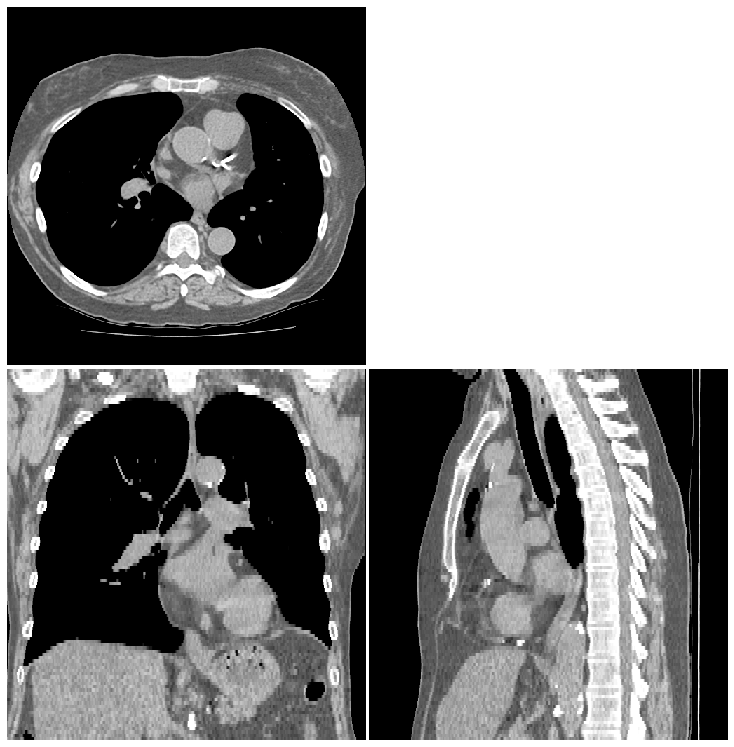

In [3]:
vis = ImageVisualiser(img_ct_lung_5)
fig = vis.show()

In [4]:
# Fast registration?
img_ct, tfm = linear_registration(
    img_ct_lung_5,
    img_ct_lung_10,
    shrink_factors=[8],
    smooth_sigmas=[0],
    reg_method='rigid'
)


In [5]:
sitk.WriteTransform(tfm, 'TransformObject.tfm')

[-250, 500]
Nda_Colormix
<class 'numpy.ndarray'>
(512, 512, 3)


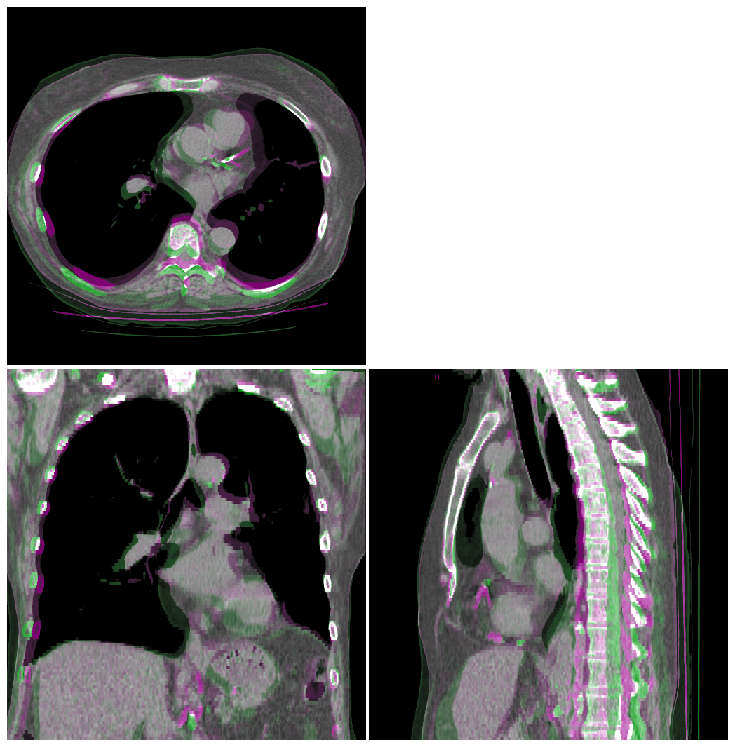

In [6]:
vis = ImageVisualiser(img_ct_lung_5)
vis.add_comparison_overlay(img_ct)
fig = vis.show()

In [7]:
contours = {}
contours_list = list(glob.glob("PRHGD5257_LUNG\STRUCTURES\*.nii.gz"))

In [8]:
for contour_name in contours_list:
    _name = contour_name.split(".nii.gz")[0].split("RTSTRUCT_")[-1]
    contours[_name] = sitk.ReadImage(contour_name)

[-250, 500]
Nda_Colormix
<class 'numpy.ndarray'>
(512, 512, 3)


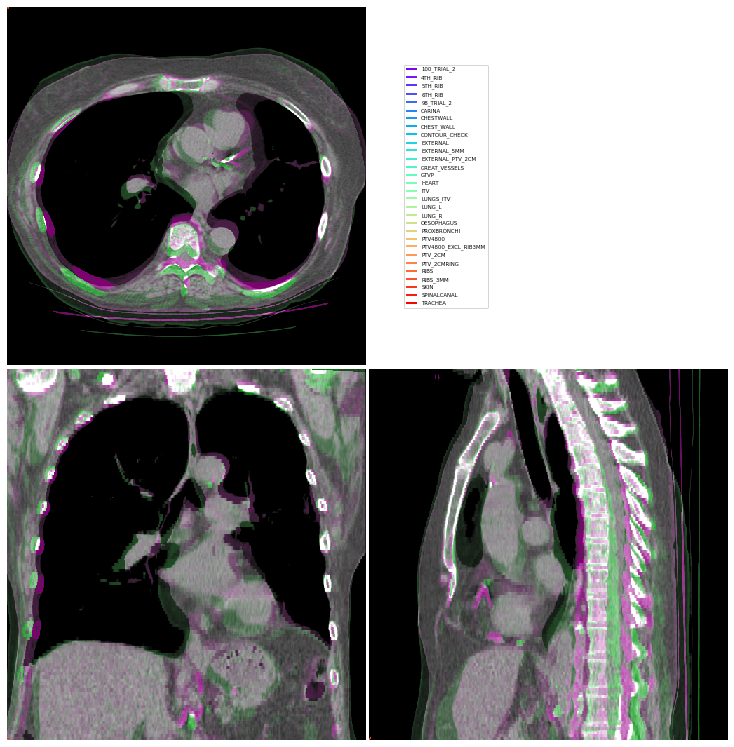

In [9]:
vis.add_contour(contours)
fig = vis.show()

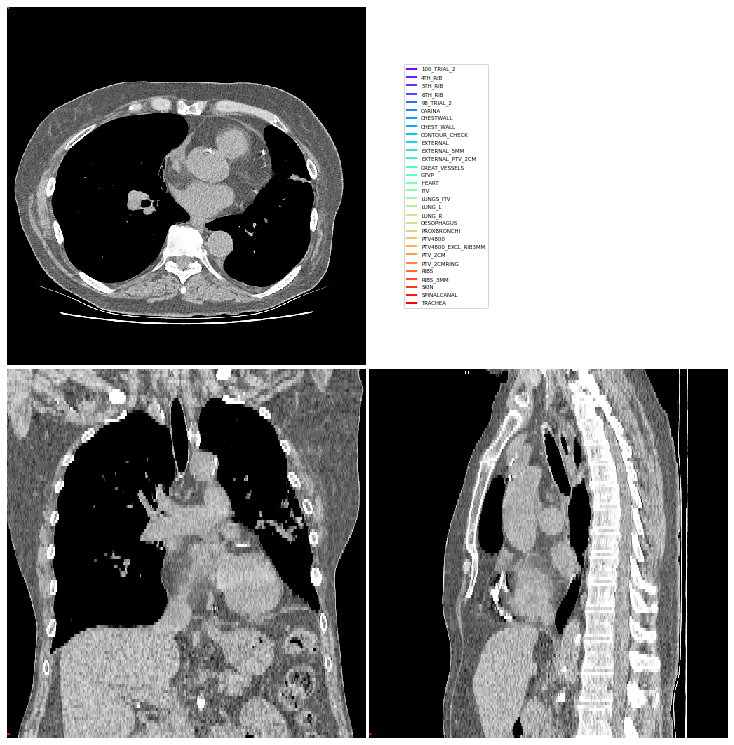

In [10]:
vis = ImageVisualiser(img_ct_lung_10)
vis.add_contour(contours)
fig = vis.show()